<a href="https://colab.research.google.com/github/cshah1995/Dogs-breed-identification/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the data

In [23]:
!wget https://www.dropbox.com/s/9kjr0ui9qbodfao/dog-breed-identification.zip # download files from Dropbox as zip

import os
import zipfile

local_zip = 'dog-breed-identification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('Dog Vision') # unzip the files into a file called "Dog Vision"
zip_ref.close()

--2021-08-25 07:17:39--  https://www.dropbox.com/s/9kjr0ui9qbodfao/dog-breed-identification.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9kjr0ui9qbodfao/dog-breed-identification.zip [following]
--2021-08-25 07:17:40--  https://www.dropbox.com/s/raw/9kjr0ui9qbodfao/dog-breed-identification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9d9299fc3f558e993fe09995d9.dl.dropboxusercontent.com/cd/0/inline/BU4nHJiBKt-50V26Y-h26H06TTYNuNZp2zEuqmrt3gqJdIOL87fU5W4LfepEREErJQqihOLmSazIfBUt6z01dleZ1OvqkmQ-BvzXSco0Knr5W0_SvdLtoYKq-I8tVpIAkyOT9JstQbdAMMrXcj0R34hh/file# [following]
--2021-08-25 07:17:40--  https://uc9d9299fc3f558e993fe09995d9.dl.dropboxusercontent.com/cd/0/inline/BU4nHJiBKt-50V26Y-h26H06TTYNuNZp2zEuqmr

### Method to download data using kaggle api.
* Ensure to enable kaggle api and download kaggle.json file

In [2]:
!pip install -q kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
! kaggle competitions download -c dog-breed-identification

In [ ]:
# ! unzip '/content/dog-breed-identification.zip' -d '/content/'

# Proceed with EDA

In [14]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [15]:
import tensorflow as hub

In [16]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
import pandas as pd
import numpy as np
import jax as jnp


In [27]:
labels = pd.read_csv('/content/Dog Vision/labels.csv')
labels.head()
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,f90e5fa3f7dabd3292fecf4312ba98c4,scottish_deerhound
freq,1,126


In [28]:
labels.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

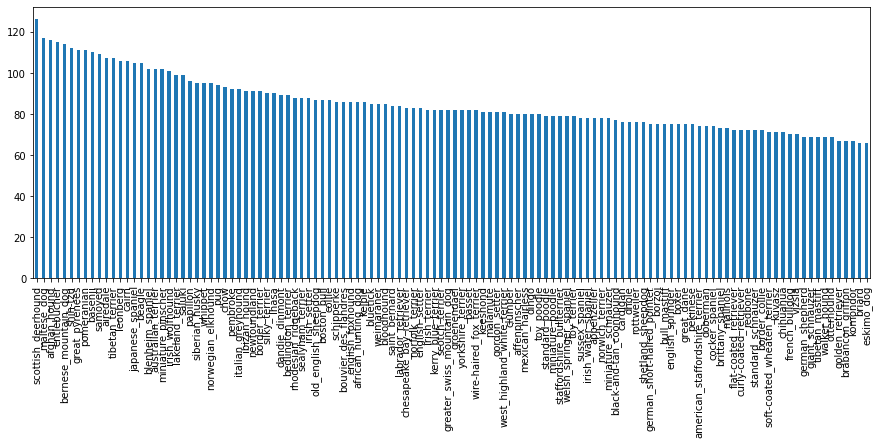

In [38]:
labels.breed.value_counts().plot.bar(figsize = (15,5))


## Let's look at the images using the image library

In [39]:
from IPython.display import Image

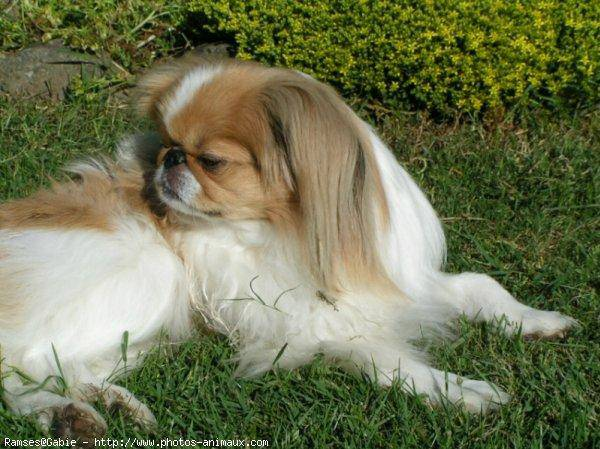

In [41]:
Image('/content/000621fb3cbb32d8935728e48679680e.jpg')

###Let's append the image id's in labels dataset as with the actual images in the train folder

In [63]:
filename = [ '/content/Dog Vision/train/' + fname + '.jpg' for fname in labels['id']]

filename[:-10220]

['/content/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg']

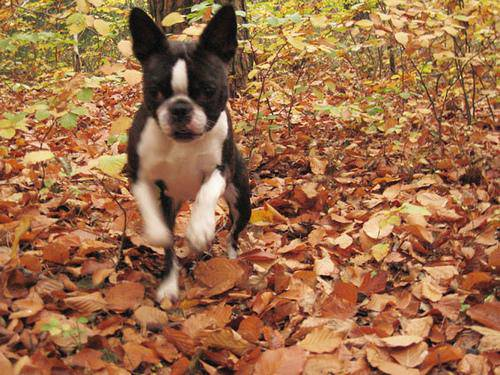

In [64]:
#we test a random image from the filename list created above

Image("/content/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Below function validates the number of images in the train folder to the number of ID's in the labels.csv file (safety check) 

In [60]:
import os 
if len(os.listdir("/content/Dog Vision/train")) == len(filename):
  print('count of images and id matches, please proceed!')
else:
  print('count mismatch, please reload dataset!')

count of images and id matches, please proceed!


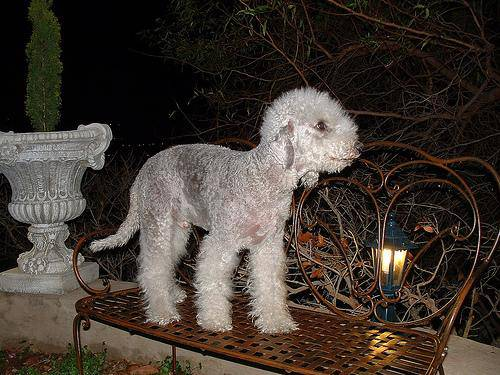

In [65]:
#validate a random image again
Image(filename[10201])

In [66]:
larray = labels['breed'].to_numpy() 

In [68]:
larray

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [69]:
if len(larray) == len(filename):
  print('count of labels match!')
else:
  print('mismatch in count, please verify!')

count of labels match!


In [70]:
ubreed = np.unique(larray)

In [71]:
len(ubreed)

120

## Let's do one hot encoding for the target labels and convert each label to an array of numbers


In [74]:
#This operation converts label at position 0 to a boolean matrix of size 120.
#It gives a True when the breed name matches in the list of unique breed

print(larray[0])
larray[0] == ubreed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [75]:
#We perform the above step for all the labels from larray

bool_larray = [label == ubreed for label in larray]

In [79]:
bool_larray[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [86]:
#Now let's convert these arrays to numeric values
print(larray[15])                      #prints the breed of dog
print(bool_larray[15].argmax())        #prints the index from the bool label array
print(np.where(ubreed == larray[15]))  #prints the index value of the unique dog breed from label array
bool_larray[15].astype(int)            #covnerts each array to number form


african_hunting_dog
2
(array([2]),)


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Split the data for training  and validation

In [89]:
X = filename
y = bool_larray

* Using magic param function

In [99]:
#For experimenting and testing hyperparameters we use a few samples only

NUM_IMAGES = 1000 #@param {type : 'slider', min : 1000, max: 10000, step : 1000}

In [100]:
from sklearn.model_selection import train_test_split

xtr, xval, ytr, yval = train_test_split(X[:NUM_IMAGES],
                                        y[:NUM_IMAGES],
                                        test_size = 0.2,
                                        random_state = 42)

In [101]:
len(xtr) , len(xval), len(ytr), len(yval)

(800, 200, 800, 200)

In [102]:
xtr[:2] , ytr[:2]

(['/content/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,

#Pre-process the image files

* Convert image files to numbers
* Reshape the images
* Convert them to tensors

In [105]:
from matplotlib.pyplot import imread

In [107]:
image = imread(filename[1])
image.shape

(375, 500, 3)

In [114]:


tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[ 51,  34,  27],
        [ 55,  38,  30],
        [ 61,  42,  35],
        ...,
        [128,  92,  60],
        [ 78,  42,  10],
        [168, 132, 100]],

       [[ 62,  45,  37],
        [ 64,  45,  38],
        [ 63,  45,  35],
        ...,
        [115,  81,  53],
        [ 46,  12,   0],
        [ 73,  39,  11]],

       [[ 57,  39,  29],
        [ 58,  38,  29],
        [ 57,  37,  28],
        ...,
        [ 60,  33,  12],
        [ 53,  26,   5],
        [ 63,  36,  15]],

       ...,

       [[192, 111,  30],
        [185, 103,  30],
        [183, 102,  36],
        ...,
        [ 52,  26,  29],
        [ 34,   8,   9],
        [ 21,   0,   0]],

       [[181, 100,  19],
        [202, 120,  47],
        [207, 126,  60],
        ...,
        [ 35,   6,   8],
        [ 58,  30,  29],
        [ 88,  60,  57]],

       [[182, 101,  20],
        [205, 123,  50],
        [216, 135,  69],
        ...,
        [ 38,   9,   